In [6]:
from cProfile import label
from cmath import exp, pi, tan, sin, sqrt,acos,asin
from re import A
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as npy
from scipy.signal import savgol_filter
from matplotlib.pyplot import MultipleLocator
import csv
# import latex
# plt.style.reload_library()
plt.style.use(['science'])
# plt.style.use(['science','ieee'])
# plt.style.use(['science','no-latex'])


In [11]:

class dataVar:
    def __init__(self,type):
        self.type=type        #type of materials
        self.wavelength=[]
        self.psi=[]
        self.delta=[]
        self.n=[]
        self.k=[]
def calculate_index(phi,delta):
    phi=float(phi*pi/180)
    delta=float(delta*pi/180)
    anglei=65/180*pi
    rho=tan(phi)*exp(delta*1j)
    n1=1.
    # print('rho',rho)
    epsilon= (n1**2) * (sin(anglei)**2) * ( 1+(tan(anglei)**2)*((1-rho)/(1+rho))**2) 
    ep_re=epsilon.real
    ep_im=epsilon.imag
    n2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) +ep_re)).real
    k2=(1./sqrt(2.) * sqrt( sqrt(ep_re**2+ep_im**2) -ep_re)).real
    return n2,k2
def reader(type):
    data=dataVar(type)
    csv_reader = csv.reader(open(type+'_65degree_CurveData.csv', 'r'))
    temp=next(csv_reader)
    while(1):
        try:
            temp=next(csv_reader)
            psi_data=[]
            delta_data=[]
            n_data=[]
            k_data=[]
            if(type=='LAB'):
                L=6
            else:
                L=8
            for i in range(L):
                psi_data.append(float(temp[1+3*i]))
                delta_data.append(float(temp[2+3*i]))
                a,b=calculate_index(float(temp[1+3*i]),float(temp[2+3*i]))
                n_data.append(a)
                k_data.append(b)
            ave_psi=npy.mean(npy.array(psi_data))
            ave_delta=npy.mean(npy.array(delta_data))
            ave_n=npy.mean(npy.array(n_data))
            ave_k=npy.mean(npy.array(k_data))
            data.psi.append(ave_psi) 
            data.delta.append(ave_delta)
            data.n.append(ave_n)
            data.k.append(ave_k)
            data.wavelength.append(float(temp[0]))  
            # print(temp[0])
        except StopIteration:
            break
    return data
def reader2(filename):
    data=dataVar(filename)
    inputfile = open(filename+'.txt','r')
    while(1):
        try:
            temp=next(inputfile).split()
            if(filename=='RENO'):
                data.wavelength.append(float(temp[0]))
                data.n.append(float(temp[1]))
            else:
                data.wavelength.append(1240./float(temp[0]))
                data.n.append(float(temp[2]))
        except StopIteration:
            break
    return data
            
def Fun(x,a0,a1,a2,k,b): #define fit function
    phi=k*x+b
    # return a0+a1*npy.cos(2*phi)
    return a0+a1*npy.cos(2*phi)+ a2*npy.sin(2*phi)




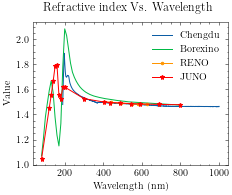

In [24]:
# typename=['LAB','PC','UPW']
# typename=['LAB']
filename=['juno','borexino','RENO']
# experimentname=['Juno','Borexino','RENO']
data_index=reader('LAB')      
data_juno=reader2(filename[0])
data_borexino=reader2(filename[1])
data_reno=reader2(filename[2])
fig,ax=plt.subplots()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Value')
ax.plot(data_index.wavelength,data_index.n,label='Chengdu'    )#,color='blue)
ax.plot(data_borexino.wavelength,data_borexino.n,label='Borexino')#,color='blue)
ax.plot(data_reno.wavelength,data_reno.n,label='RENO',marker='.',markersize=5)#,color='blue)
ax.plot(data_juno.wavelength,data_juno.n,label='JUNO',marker='*',markersize=5,color='r'       )#,color='blue)
fig.suptitle('Refractive index Vs. Wavelength')
fig.subplots_adjust(hspace=0)
ax.legend()
fig.savefig('figure/'+'DiffExpRindexVsWavelength.png',dpi=1000)

